# EDA and Basic Model Selection

***

## Project Description

For this assignment, you will need to imagine that you are a 
statistical consultant who has recently been hired by a real estate 
investment firm based in Ames, Iowa. They have had an intern collect and
 collate all of the recent house sales in Ames and have put together a 
large spreadsheet that contains the sale price of each house along with 
many of its physical features. Your employers want you to take this data
 and develop a model to predict the selling price of a given home.  They
 hope to use this information to help assess whether the asking price of
 a house is higher or lower than the true value of the house.  If the 
home is undervalued, it may be a good investment for the firm.

Your employers are savvy and have been successfully investing in real estate
 for a long time but they hope a more model-based approach will help 
focus their search, improving efficiency and the bottom line. The firm 
plans to use a combination of your model and industry professional 
expertise to make its investment decisions. Because of this, the firm is
 not willing to accept a black box solution - they have specified that 
they must be able to understand the details of your model, including its
 strengths and its weaknesses. 

The goal of this assignment is to explore the data set that you will be using in your analysis of the housing market. 

You will create some graphs to help you explore. You will also look at whether there are missing values in the variables. Finally, there will be a model selection section in which you will select a regression model. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

import pycaret

from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("amestrain.csv")

In [3]:
df

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,238.00,Unf,0.00,618.00,856.00,GasA,TA,Y,SBrkr,856,0,0,1.00,0.00,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.00,Unf,2.00,399.00,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.00,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.00,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.00,ALQ,393.00,104.00,1049.00,GasA,TA,Y,SBrkr,1049,0,0,1.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.00,Fin,1.00,266.00,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.00,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.00,Gd,TA,BrkTil,TA,TA,No,ALQ,737.00,Unf,0.00,100.00,837.00,GasA,Ex,Y,SBrkr,1001,0,0,0.00,0.00,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.00,Unf,1.00,216.00,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.00,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.00,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.00,Unf,0.00,405.00,405.00,GasA,Gd,Y,SBrkr,717,322,0,0.00,0.00,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.00,Unf,1.00,281.00,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.00,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,TA,No,GLQ,643.00,Unf,0.00,167.00,810.00,GasA,Ex,Y,SBrkr,810,855,0,1.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.00,Fin,2.00,528.00,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,907290250,848,145000,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,205.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,662.00,Unf,0.00,186.00,848.00,GasA,Ex,Y,SBrkr,848,0,0,1.00,0.00,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2004.00,RFn,2.00,420.00,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
996,528480150,1576,197000,60,FV,65.00,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,Gd,No,Unf,0.00,Unf,0.00,770.00,770.00,GasA,Ex,Y,SBrkr,778,798,0,0.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2006.00,RFn,2.00,614.00,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial
997,534427010,1728,84900,90,RL,98.00,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.00,TA,TA,CBlock,TA,TA,No,BLQ,1500.00,Unf,0.00,228.00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              1000 non-null   int64  
 1   area             1000 non-null   int64  
 2   price            1000 non-null   int64  
 3   MS.SubClass      1000 non-null   int64  
 4   MS.Zoning        1000 non-null   object 
 5   Lot.Frontage     833 non-null    float64
 6   Lot.Area         1000 non-null   int64  
 7   Street           1000 non-null   object 
 8   Alley            67 non-null     object 
 9   Lot.Shape        1000 non-null   object 
 10  Land.Contour     1000 non-null   object 
 11  Utilities        1000 non-null   object 
 12  Lot.Config       1000 non-null   object 
 13  Land.Slope       1000 non-null   object 
 14  Neighborhood     1000 non-null   object 
 15  Condition.1      1000 non-null   object 
 16  Condition.2      1000 non-null   object 
 17  Bldg.Type      

In [5]:
df.describe()

,PID,area,price,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold
count,1000.00,1000.00,1000.00,1000.00,833.00,1000.00,1000.00,1000.00,1000.00,1000.00,993.00,999.00,999.00,999.00,999.00,1000.00,1000.00,1000.00,999.00,999.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,952.00,999.00,999.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,705924438.80,1476.62,181190.08,57.15,69.21,10352.41,6.09,5.56,1972.20,1984.34,104.13,464.15,48.07,546.99,1059.20,1157.09,315.20,4.32,0.45,0.06,1.54,0.38,2.81,1.04,6.34,0.60,1977.92,1.77,475.41,93.84,48.93,23.48,3.12,14.77,1.46,45.81,6.24,2007.77
std,188569821.87,505.17,81909.79,43.02,24.29,9827.84,1.41,1.09,29.64,20.56,184.41,453.55,167.03,428.08,426.33,385.46,424.28,48.89,0.53,0.25,0.54,0.50,0.83,0.20,1.58,0.65,25.27,0.76,218.78,123.32,69.59,60.59,29.22,53.96,30.48,560.29,2.75,1.30
min,526302030.00,334.00,12789.00,20.00,21.00,1470.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,528477042.50,1092.00,129762.50,20.00,57.00,7314.00,5.00,5.00,1955.00,1966.00,0.00,0.00,0.00,223.50,797.50,876.25,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,312.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,535425070.00,1411.00,159467.00,50.00,69.00,9317.00,6.00,5.00,1975.00,1992.50,0.00,400.00,0.00,461.00,998.00,1080.50,0.00,0.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1979.00,2.00,480.00,0.00,28.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,907145180.00,1743.25,213000.00,70.00,80.00,11649.75,7.00,6.00,2001.00,2004.00,160.00,773.00,0.00,783.00,1301.00,1376.25,688.25,0.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,74.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,1007100110.00,4676.00,615000.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1290.00,2260.00,1526.00,2336.00,3138.00,3138.00,1836.00,1064.00,3.00,2.00,4.00,2.00,6.00,2.00,13.00,4.00,2010.00,5.00,1390.00,857.00,742.00,432.00,508.00,440.00,800.00,15500.00,12.00,2010.00


In [6]:
df.columns

Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
       'Wo

### Make a labeled histogram (with 30 bins) of the ages of the houses in the data set, and describe the distribution.

In [7]:
df["Age"] = 2021 - df["Year.Built"]

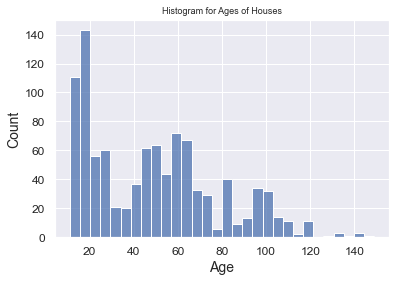

In [8]:
sns.histplot(data=df.Age, bins=30)
plt.title("Histogram for Ages of Houses")
plt.show()

In [9]:
df.Age.skew()

0.6591292045100208

The graph is right-skewed with median is higher than mean ages.

### The mantra in real estate is "Location, Location, Location!" Make a graphical display that relates a home price to its neighborhood in Ames, Iowa. Which summary statistics are most appropriate to use for determining the most expensive, least expensive, and most heterogeneous (having the most variation in housing price) neighborhoods? Report which neighborhoods these are based on the summary statistics of your choice. Report the value of your chosen summary statistics for these neighborhoods.

In [10]:
df.groupby(['Neighborhood'])['price'].median()

Neighborhood
Blmngtn   191000.00
Blueste   123900.00
BrDale     98750.00
BrkSide   124000.00
ClearCr   185000.00
CollgCr   195800.00
Crawfor   205000.00
Edwards   127250.00
Gilbert   183500.00
Greens    212625.00
GrnHill   280000.00
IDOTRR     99500.00
MeadowV    85750.00
Mitchel   156500.00
NAmes     139900.00
NPkVill   142100.00
NWAmes    185000.00
NoRidge   290000.00
NridgHt   336860.00
OldTown   120000.00
SWISU     134000.00
Sawyer    136000.00
SawyerW   182500.00
Somerst   221650.00
StoneBr   340691.50
Timber    232500.00
Veenker   205750.00
Name: price, dtype: float64

In [11]:
df.groupby(['Neighborhood'])['price'].median().describe()

count       27.00
mean    182797.28
std      68466.00
min      85750.00
25%     130625.00
50%     183500.00
75%     209187.50
max     340691.50
Name: price, dtype: float64

In [12]:
hseneigh = pd.DataFrame(df.groupby(['Neighborhood'])['price'].median())
hseneigh

,price
Neighborhood,
Blmngtn,191000.00
Blueste,123900.00
BrDale,98750.00
BrkSide,124000.00
ClearCr,185000.00
CollgCr,195800.00
Crawfor,205000.00
Edwards,127250.00
Gilbert,183500.00


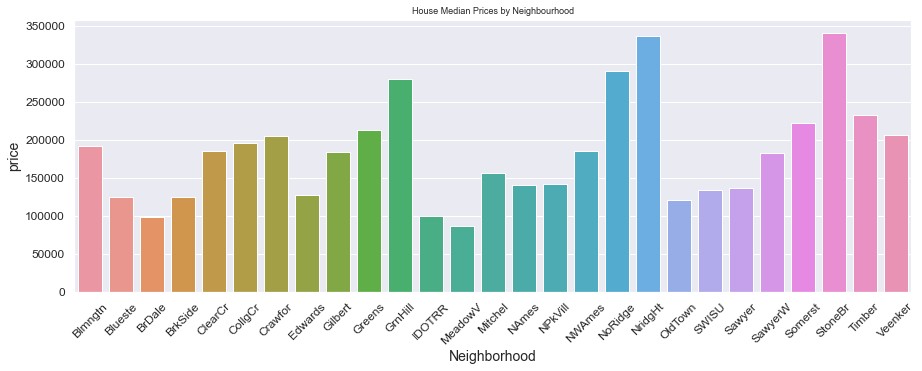

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=hseneigh.index, y=hseneigh.price, data=hseneigh, ci=None)
plt.xticks(rotation=45)
plt.title("House Median Prices by Neighbourhood")
plt.show()

### Which variable has the largest number of missing values? Explain why it makes sense that there are so many missing values for this variable.

In [14]:
df.columns

Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
       'Wo

In [15]:
df.isnull().sum().sort_values()

PID                  0
Sale.Condition       0
Heating              0
Heating.QC           0
Central.Air          0
Electrical           0
X1st.Flr.SF          0
X2nd.Flr.SF          0
Low.Qual.Fin.SF      0
Full.Bath            0
Half.Bath            0
Bedroom.AbvGr        0
Kitchen.AbvGr        0
Kitchen.Qual         0
TotRms.AbvGrd        0
Functional           0
Fireplaces           0
Paved.Drive          0
Wood.Deck.SF         0
Open.Porch.SF        0
Enclosed.Porch       0
X3Ssn.Porch          0
Screen.Porch         0
Pool.Area            0
Misc.Val             0
Mo.Sold              0
Yr.Sold              0
Sale.Type            0
Foundation           0
Exter.Cond           0
Age                  0
Land.Slope           0
Neighborhood         0
Condition.1          0
Condition.2          0
Bldg.Type            0
House.Style          0
Overall.Qual         0
Overall.Cond         0
Year.Built           0
Year.Remod.Add       0
Exter.Qual           0
Roof.Matl            0
Roof.Style 

Pool QC (Ordinal): Pool quality has highest missing values. It maybe due to no one monitors the pool condition and jot the data down.

### We want to predict the natural log of the home prices. Candidate explanatory variables are lot size in square feet (Lot.Area), slope of property (Land.Slope), original construction date (Year.Built), remodel date (Year.Remod.Add), and the number of bedrooms above grade (Bedroom.AbvGr). Pick a model selection or model averaging method covered in the Specialization, and describe how this method works. Then, use this method to find the best multiple regression model for predicting the natural log of the home prices.

I will use Linear Regression model to predict log prices. The target variable is price which is continous data type.

In [16]:
df2 = df[["Lot.Area","Land.Slope","Year.Built","Year.Remod.Add","Bedroom.AbvGr","price"]]

In [17]:
df2

,Lot.Area,Land.Slope,Year.Built,Year.Remod.Add,Bedroom.AbvGr,price
0,7890,Gtl,1939,1950,2,126000
1,4235,Gtl,1984,1984,2,139500
2,6060,Gtl,1930,2007,2,124900
3,8146,Gtl,1900,2003,2,114000
4,8400,Gtl,2001,2001,3,227000
...,...,...,...,...,...,...
995,4426,Gtl,2004,2004,1,145000
996,8125,Gtl,2006,2006,3,197000
997,13260,Gtl,1962,2001,6,84900
998,9364,Gtl,1969,1969,4,158000


In [18]:
df2["Land.Slope"].value_counts()

Gtl    962
Mod     33
Sev      5
Name: Land.Slope, dtype: int64

In [19]:
df3 = pd.get_dummies(df2)
df3

,Lot.Area,Year.Built,Year.Remod.Add,Bedroom.AbvGr,price,Land.Slope_Gtl,Land.Slope_Mod,Land.Slope_Sev
0,7890,1939,1950,2,126000,1,0,0
1,4235,1984,1984,2,139500,1,0,0
2,6060,1930,2007,2,124900,1,0,0
3,8146,1900,2003,2,114000,1,0,0
4,8400,2001,2001,3,227000,1,0,0
...,...,...,...,...,...,...,...,...
995,4426,2004,2004,1,145000,1,0,0
996,8125,2006,2006,3,197000,1,0,0
997,13260,1962,2001,6,84900,1,0,0
998,9364,1969,1969,4,158000,1,0,0


In [20]:
df3 = df3[['Lot.Area', 'Year.Built', 'Year.Remod.Add', 'Bedroom.AbvGr', 'Land.Slope_Gtl', 
           'Land.Slope_Mod', 'Land.Slope_Sev', 'price']]

In [21]:
df3.head()

,Lot.Area,Year.Built,Year.Remod.Add,Bedroom.AbvGr,Land.Slope_Gtl,Land.Slope_Mod,Land.Slope_Sev,price
0,7890,1939,1950,2,1,0,0,126000
1,4235,1984,1984,2,1,0,0,139500
2,6060,1930,2007,2,1,0,0,124900
3,8146,1900,2003,2,1,0,0,114000
4,8400,2001,2001,3,1,0,0,227000


In [22]:
df3["price_log"] = np.log(df3.price)

In [23]:
df3.head()

,Lot.Area,Year.Built,Year.Remod.Add,Bedroom.AbvGr,Land.Slope_Gtl,Land.Slope_Mod,Land.Slope_Sev,price,price_log
0,7890,1939,1950,2,1,0,0,126000,11.74
1,4235,1984,1984,2,1,0,0,139500,11.85
2,6060,1930,2007,2,1,0,0,124900,11.74
3,8146,1900,2003,2,1,0,0,114000,11.64
4,8400,2001,2001,3,1,0,0,227000,12.33


### Linear Regression (StatsModel)

In [24]:
df3.columns

Index(['Lot.Area', 'Year.Built', 'Year.Remod.Add', 'Bedroom.AbvGr', 'Land.Slope_Gtl', 'Land.Slope_Mod', 'Land.Slope_Sev', 'price', 'price_log'], dtype='object')

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot.Area        1000 non-null   int64  
 1   Year.Built      1000 non-null   int64  
 2   Year.Remod.Add  1000 non-null   int64  
 3   Bedroom.AbvGr   1000 non-null   int64  
 4   Land.Slope_Gtl  1000 non-null   uint8  
 5   Land.Slope_Mod  1000 non-null   uint8  
 6   Land.Slope_Sev  1000 non-null   uint8  
 7   price           1000 non-null   int64  
 8   price_log       1000 non-null   float64
dtypes: float64(1), int64(5), uint8(3)
memory usage: 49.9 KB


In [26]:
y = df3[['price_log']]
X = df3[['Lot.Area', 'Year.Built', 'Year.Remod.Add', 'Bedroom.AbvGr', 'Land.Slope_Gtl', 'Land.Slope_Mod', 'Land.Slope_Sev']]

In [27]:
X = sm.add_constant(X)

In [28]:
model = sm.OLS(y,X).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     212.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.25e-174
Time:                        10:11:36   Log-Likelihood:                -139.05
No. Observations:                1000   AIC:                             292.1
Df Residuals:                     993   BIC:                             326.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.3653      0.642    -16.135      0.000     -11.626      -9.105
Lot.Area        1.028e-05   1.11e-06      9.296      0.000    8.11e-06    1.24e-05
Year.Built         0.0060      0.000     15.968      0.000       0.005       0.007
Year.Remod.Add     0.0068      0.001     12.395      0.000       0.006       0.008
Bedroom.AbvGr      0.0869      0.011      8.063      0.000       0.066       0.108
Land.Slope_Gtl    -3.3490      0.220    -15.219      0.000      -3.781      -2.917
Land.Slope_Mod    -3.2106      0.222    -14.453      0.000      -3.646      -2.775
Land.Slope_Sev    -3.8057      0.237    -16.038      0.000      -4.271      -3.340
==============================================================================
Omnibus:                      105.181   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.299
Skew:                          -0.296   Prob(JB):                    1.19e-125
Kurtosis:                       6.668   Cond. No.                     4.84e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.89e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Use all variables as p-value is less than 0.05.

### Residual Plots

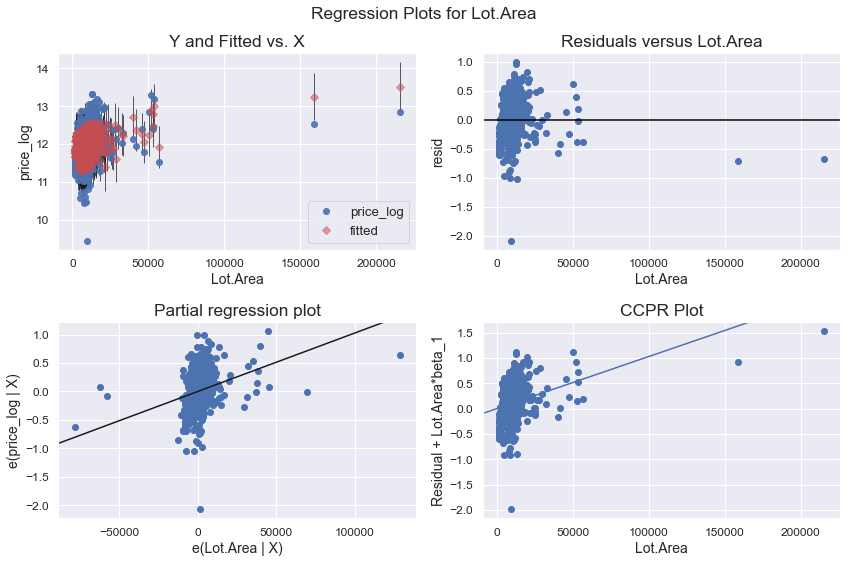

In [30]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Lot.Area', fig=fig)

### Which home has the largest squared residual in the previous analysis (Question 4)? Looking at all the variables in the data set, can you explain why this home stands out from the rest (what factors contribute to the high squared residual and why are those factors relevant)?

In [31]:
influence = OLSInfluence(model)

In [32]:
influence.resid.sort_values()

427   -2.09
997   -1.03
644   -1.00
917   -0.97
558   -0.91
       ... 
103    0.76
23     0.79
388    0.82
584    0.95
65     0.99
Length: 1000, dtype: float64

In [33]:
df.iloc[427].head(5)

PID            902207130
area                 832
price              12789
MS.SubClass           30
MS.Zoning             RM
Name: 427, dtype: object

The home with the largest squared residual has ```PID``` 902207130. It has the lowest price in all houses.

In [34]:
df.price.describe()

count     1000.00
mean    181190.08
std      81909.79
min      12789.00
25%     129762.50
50%     159467.00
75%     213000.00
max     615000.00
Name: price, dtype: float64

### Use the same model selection method you chose in Question 4 to again find the best multiple regression model to predict the natural log of home prices, but this time **replacing Lot.Area with log(Lot.Area)**. Do you arrive at a model including the same set of predictors?

In [35]:
df3["area_log"] = np.log(df3["Lot.Area"])

In [36]:
df3.head()

,Lot.Area,Year.Built,Year.Remod.Add,Bedroom.AbvGr,Land.Slope_Gtl,Land.Slope_Mod,Land.Slope_Sev,price,price_log,area_log
0,7890,1939,1950,2,1,0,0,126000,11.74,8.97
1,4235,1984,1984,2,1,0,0,139500,11.85,8.35
2,6060,1930,2007,2,1,0,0,124900,11.74,8.71
3,8146,1900,2003,2,1,0,0,114000,11.64,9.01
4,8400,2001,2001,3,1,0,0,227000,12.33,9.04


In [37]:
df3.columns

Index(['Lot.Area', 'Year.Built', 'Year.Remod.Add', 'Bedroom.AbvGr', 'Land.Slope_Gtl', 'Land.Slope_Mod', 'Land.Slope_Sev', 'price', 'price_log', 'area_log'], dtype='object')

In [38]:
df4 = df3[['area_log','Year.Built', 'Year.Remod.Add', 'Bedroom.AbvGr', 'Land.Slope_Gtl', 
           'Land.Slope_Mod', 'Land.Slope_Sev', 'price_log']]

In [39]:
df4.head()

,area_log,Year.Built,Year.Remod.Add,Bedroom.AbvGr,Land.Slope_Gtl,Land.Slope_Mod,Land.Slope_Sev,price_log
0,8.97,1939,1950,2,1,0,0,11.74
1,8.35,1984,1984,2,1,0,0,11.85
2,8.71,1930,2007,2,1,0,0,11.74
3,9.01,1900,2003,2,1,0,0,11.64
4,9.04,2001,2001,3,1,0,0,12.33


In [40]:
y2 = df4[['price_log']]
X2 = df4[['area_log','Year.Built', 'Year.Remod.Add', 'Bedroom.AbvGr', 'Land.Slope_Gtl', 
           'Land.Slope_Mod', 'Land.Slope_Sev']]

In [41]:
X2 = sm.add_constant(X2)

In [42]:
model2 = sm.OLS(y2,X2).fit()

In [43]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     254.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.12e-196
Time:                        10:11:37   Log-Likelihood:                -87.190
No. Observations:                1000   AIC:                             188.4
Df Residuals:                     993   BIC:                             222.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.6352      0.616    -18.892      0.000     -12.844     -10.427
area_log           0.2442      0.017     14.297      0.000       0.211       0.278
Year.Built         0.0060      0.000     16.628      0.000       0.005       0.007
Year.Remod.Add     0.0067      0.001     12.975      0.000       0.006       0.008
Bedroom.AbvGr      0.0591      0.011      5.599      0.000       0.038       0.080
Land.Slope_Gtl    -3.8949      0.207    -18.782      0.000      -4.302      -3.488
Land.Slope_Mod    -3.7798      0.211    -17.933      0.000      -4.193      -3.366
Land.Slope_Sev    -3.9605      0.224    -17.660      0.000      -4.401      -3.520
==============================================================================
Omnibus:                      151.066   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1019.723
Skew:                          -0.489   Prob(JB):                    3.72e-222
Kurtosis:                       7.850   Cond. No.                     9.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.9e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Using log(Lot.Area) does change the final model for two model selection methods. R2 has increased.

### Do you think it is better to log transform Lot.Area, in terms of assumptions for linear regression? Make graphs of the predicted values of log home price versus the true values of log home price for the regression models selected for Lot.Area and log(Lot.Area). Referencing these two plots, provide a written support that includes a quantitative justification for your answer in the first part of question 7.

In [44]:
y_pred = model.predict(X)

In [45]:
y_pred

0     11.49
1     11.95
2     11.80
3     11.61
4     12.30
       ... 
995   12.12
996   12.36
997   12.37
998   11.99
999   11.91
Length: 1000, dtype: float64

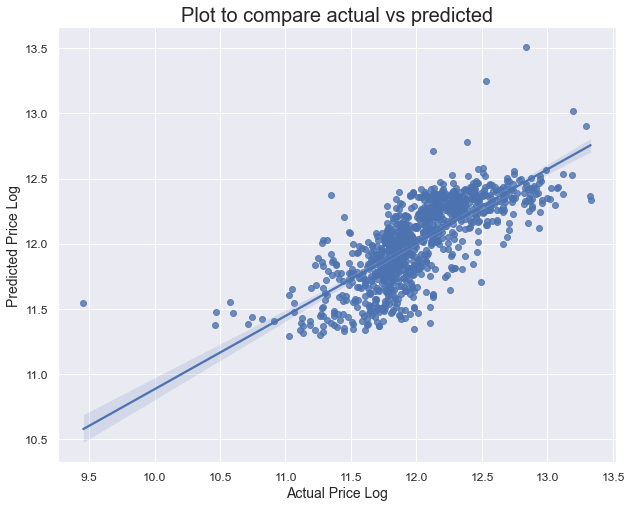

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=df3.price_log, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted Price Log")
plt.xlabel("Actual Price Log")
plt.show()

In [47]:
y_pred2 = model2.predict(X2)

In [48]:
y_pred2

0     11.51
1     11.85
2     11.77
3     11.64
4     12.30
       ... 
995   12.06
996   12.35
997   12.35
998   11.98
999   11.92
Length: 1000, dtype: float64

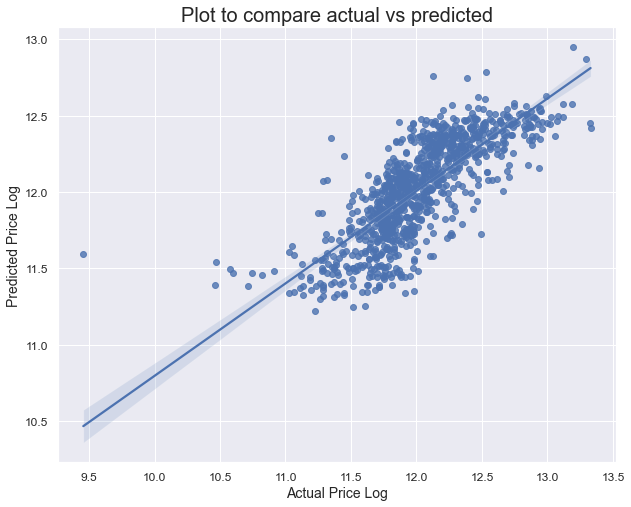

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=df4.price_log, y=y_pred2, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted Price Log")
plt.xlabel("Actual Price Log")
plt.show()

Using 'Lot.Area.log' in the plot helps to capture much more uncertainty than the plot using 'Lot.Area'.

R2 for 'Lot.Area.log' is 0.606 compared to 'Lot.Area' is 0.562. Therefore 'Lot.Area.log' variable able to explain better the price_log in a regression model.